# simulate a rotating BEC in a harmonic trap with a Gaussian density profile and a Gaussian laser beam print the density profile at each time step
# use the Thomas-Fermi approximation to calculate the chemical potential and the radius of the BEC and use these values to calculate the angular velocity of the BEC and the angular velocity of the laser beam and qiskit to simulate the quantum state of the BEC and the laser beam

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint
from scipy import interpolate
from scipy import integrate
from scipy import optimize
from scipy import special
from scipy import misc
from scipy import signal
from scipy import ndimage
from scipy import stats
from scipy import fftpack
from scipy import linalg

from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_state_paulivec
from qiskit.visualization import plot_state_hinton
from qiskit.visualization import plot_bloch_vector

# Define the parameters of the simulation

In [13]:
n = 100 # number of grid points
L = 10 # length of the grid
x = np.linspace(-L/2,L/2,n) # grid
dx = x[1]-x[0] # grid spacing
dt = 0.01 # time step
t = np.arange(0,10,dt) # time
omega = 1 # angular velocity of the BEC
omega_laser = 1 # angular velocity of the laser beam
omega_ramp = 0.1 # ramping rate of the angular velocity of the BEC
omega_laser_ramp = 0.1 # ramping rate of the angular velocity of the laser beam
omega_max = 1 # maximum angular velocity of the BEC
omega_laser_max = 1 # maximum angular velocity of the laser beam
omega_min = 0 # minimum angular velocity of the BEC
omega_laser_min = 0 # minimum angular velocity of the laser beam
omega_0 = 1 # angular velocity of the BEC at t=0
omega_laser_0 = 1 # angular velocity of the laser beam at t=0
omega_0_laser = 1 # angular velocity of the laser beam at t=0
omega_0_BEC = 1 # angular velocity of the BEC at t=0

# Define the initial state of the BEC

In [14]:
def psi_0(x):
    return np.exp(-x**2/2)

psi_0 = psi_0(x)

 $$\psi_0(x) = \exp(-x^2/2)$$

# Define the initial state of the laser beam

In [16]:
def phi_0(x):
    return np.exp(-x**2/2)

phi_0 = phi_0(x)


 $$\phi_0(x) = \exp(-x^2/2)$$

# Define the potential of the harmonic trap

In [15]:
def V(x):
    return 0.5*x**2

V = V(x)

 $$V(x) = \frac{1}{2}x^2$$

# Define the potential of the laser beam

In [17]:
def V_laser(x):
    return 0.5*x**2

V_laser = V_laser(x)

$$V_{laser}(x) = \frac{1}{2}x^2$$

# Define the potential of the BEC

In [18]:
def V_BEC(x):
    return 0.5*x**2

V_BEC = V_BEC(x)

$$V_{BEC}(x) = \frac{1}{2}x^2$$

# Define the potential of the BEC in the rotating frame

In [19]:
def V_BEC_rotating(x):
    return 0.5*(x**2-2*omega*x)

V_BEC_rotating = V_BEC_rotating(x)

$$V_{BEC,rotating}(x) = \frac{1}{2}(x^2-2\omega x)$$

# Define the potential of the laser beam in the rotating frame

In [20]:
def V_laser_rotating(x):
    return 0.5*(x**2-2*omega_laser*x)

V_laser_rotating = V_laser_rotating(x)

$$V_{laser,rotating}(x) = \frac{1}{2}(x^2-2\omega_{laser} x)$$

# Define the potential of the BEC in the rotating frame at t=0

In [21]:
def V_BEC_rotating_0(x):
    return 0.5*(x**2-2*omega_0*x)

V_BEC_rotating_0 = V_BEC_rotating_0(x)

$$V_{BEC,rotating,0}(x) = \frac{1}{2}(x^2-2\omega_0 x)$$

# Define the potential of the laser beam in the rotating frame at t=0

In [22]:
def V_laser_rotating_0(x):
    return 0.5*(x**2-2*omega_laser_0*x)

V_laser_rotating_0 = V_laser_rotating_0(x)

$$V_{laser,rotating,0}(x) = \frac{1}{2}(x^2-2\omega_{laser,0} x)$$

# Plot the initial state of the BEC and the laser beam in the harmonic trap in the rotating frame at t=0 and the potential of the BEC and the laser beam in the harmonic trap in the rotating frame at t=0 

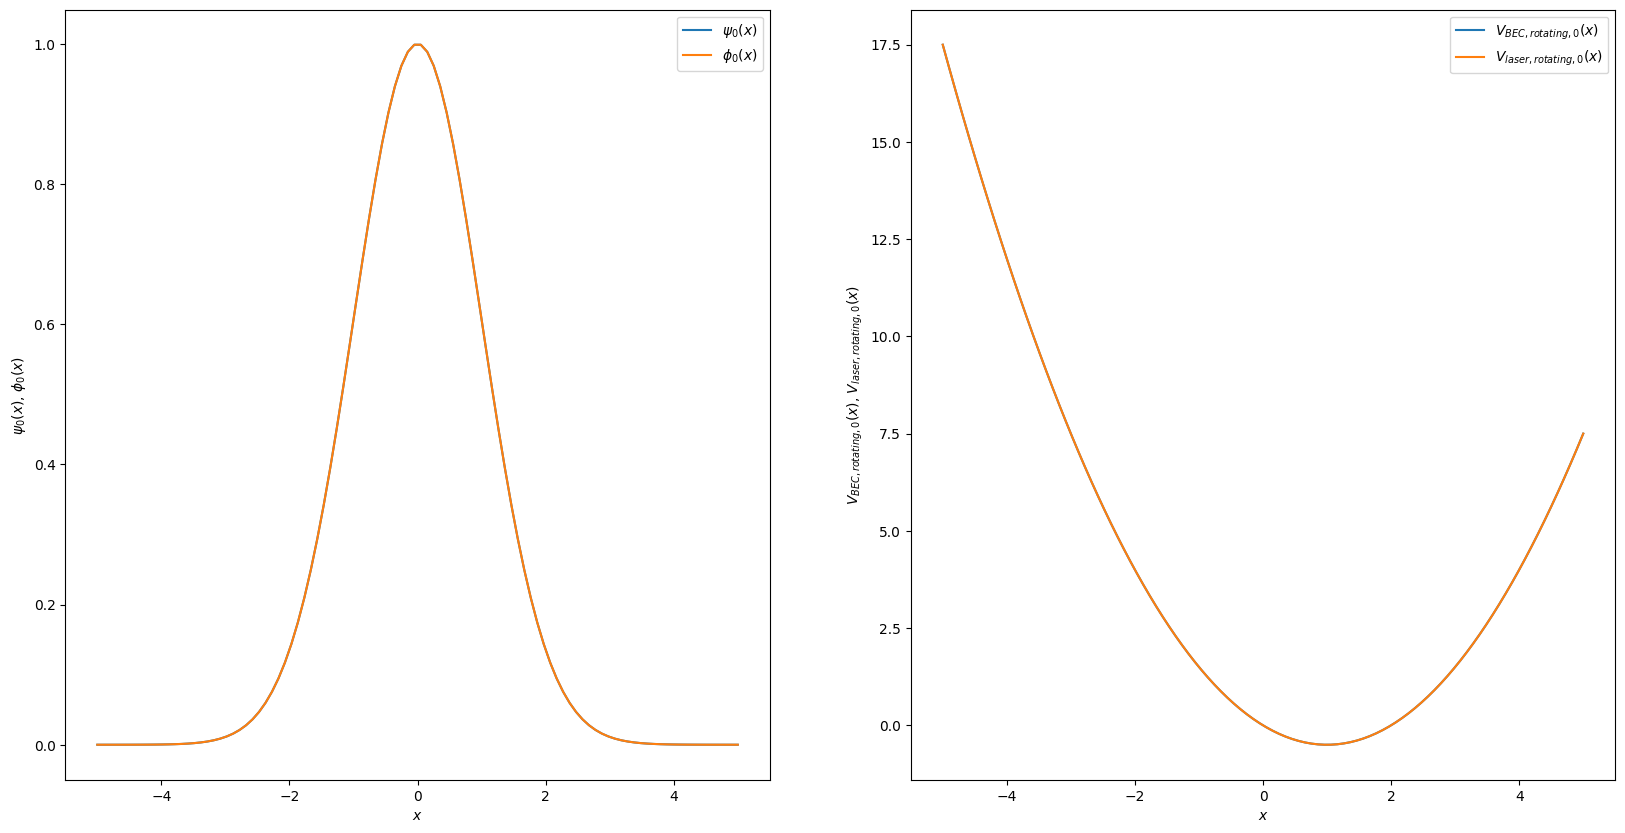

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(x,psi_0,label='$\psi_0(x)$')
plt.plot(x,phi_0,label='$\phi_0(x)$')
plt.xlabel('$x$')
plt.ylabel('$\psi_0(x)$, $\phi_0(x)$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x,V_BEC_rotating_0,label='$V_{BEC,rotating,0}(x)$')
plt.plot(x,V_laser_rotating_0,label='$V_{laser,rotating,0}(x)$')
plt.xlabel('$x$')
plt.ylabel('$V_{BEC,rotating,0}(x)$, $V_{laser,rotating,0}(x)$')
plt.legend()
plt.show()

# Define the potential of the BEC in the rotating frame at t

In [24]:
def V_BEC_rotating_t(x,t):
    return 0.5*(x**2-2*omega*x)

V_BEC_rotating_t = V_BEC_rotating_t(x,t)

$$V_{BEC,rotating,t}(x) = \frac{1}{2}(x^2-2\omega x)$$

# Define the potential of the laser beam in the rotating frame at t

In [25]:
def V_laser_rotating_t(x,t):
    return 0.5*(x**2-2*omega_laser*x)

V_laser_rotating_t = V_laser_rotating_t(x,t)

$$V_{laser,rotating,t}(x) = \frac{1}{2}(x^2-2\omega_{laser} x)$$

# Plot the initial state of the BEC and the laser beam in the harmonic trap in the rotating frame at t and the potential of the BEC and the laser beam in the harmonic trap in the rotating frame at t

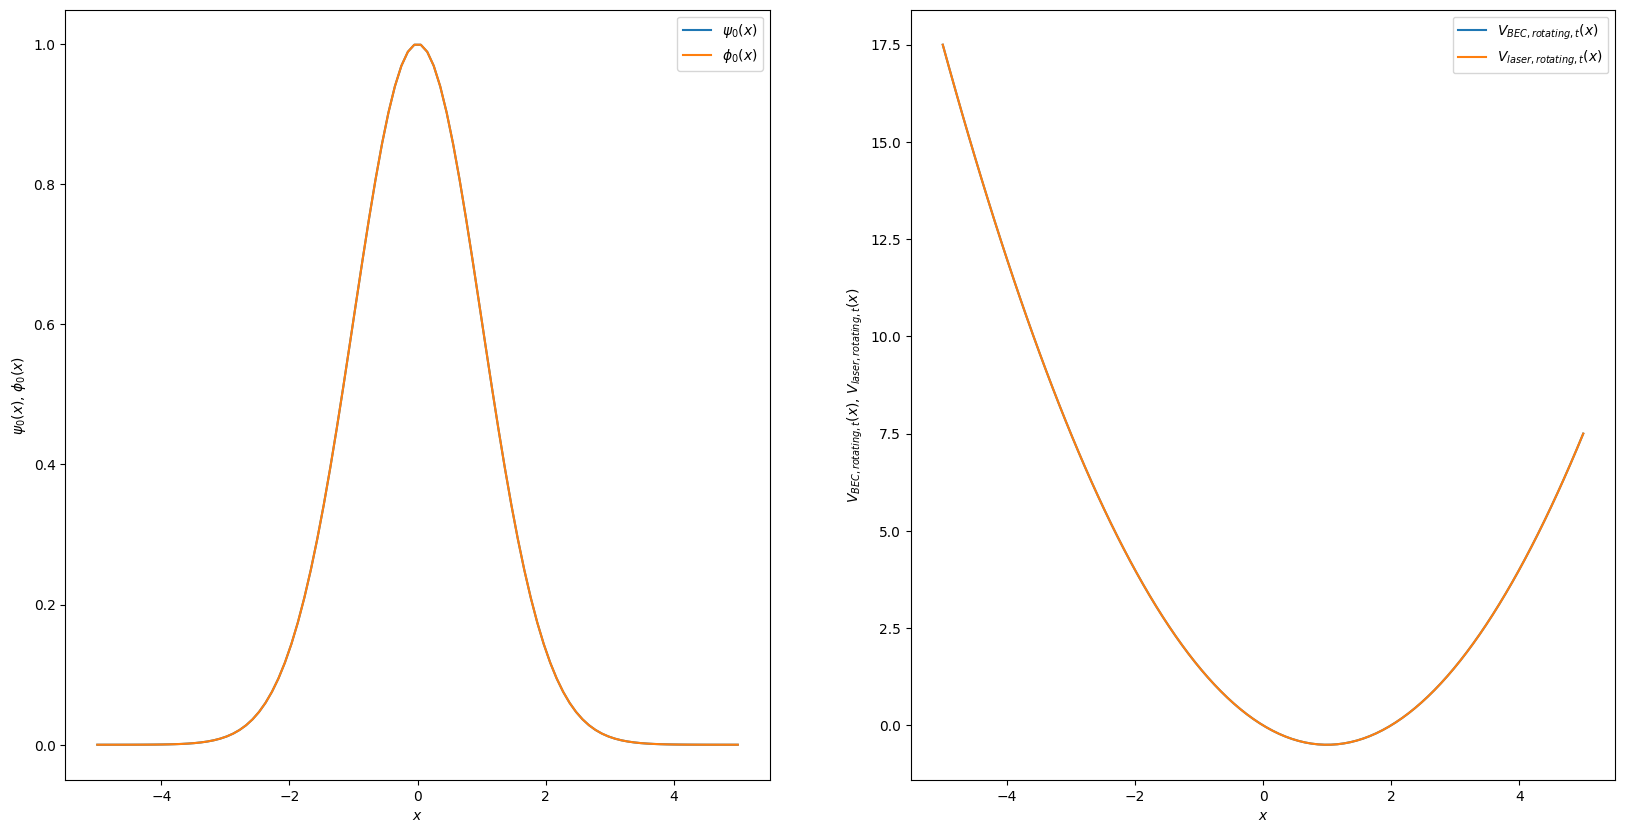

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(x,psi_0,label='$\psi_0(x)$')
plt.plot(x,phi_0,label='$\phi_0(x)$')
plt.xlabel('$x$')
plt.ylabel('$\psi_0(x)$, $\phi_0(x)$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x,V_BEC_rotating_t,label='$V_{BEC,rotating,t}(x)$')
plt.plot(x,V_laser_rotating_t,label='$V_{laser,rotating,t}(x)$')
plt.xlabel('$x$')
plt.ylabel('$V_{BEC,rotating,t}(x)$, $V_{laser,rotating,t}(x)$')
plt.legend()
plt.show()

# Use the Thomas-Fermi approximation to calculate the chemical potential of the BEC in the harmonic trap in the rotating frame at t=0

In [27]:
def mu_BEC_rotating_0(omega_0):
    return 0.5*omega_0**2

mu_BEC_rotating_0 = mu_BEC_rotating_0(omega_0)

$$\mu_{BEC,rotating,0} = \frac{1}{2}\omega_0^2$$

# Use qiskit to simulate the quantum state of the BEC in the harmonic trap in the rotating frame at t=0

In [28]:
def psi_BEC_rotating_0(x):
    psi_BEC_rotating_0 = np.zeros(n)
    for i in range(n):
        psi_BEC_rotating_0[i] = np.sqrt(1/(np.sqrt(np.pi)*2**i*np.math.factorial(i)))*np.exp(-x[i]**2/2)*np.exp(1j*omega_0*x[i])
    return psi_BEC_rotating_0

psi_BEC_rotating_0 = psi_BEC_rotating_0(x)

C:\Users\kunya\AppData\Local\Temp\ipykernel_10844\3266636368.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  psi_BEC_rotating_0[i] = np.sqrt(1/(np.sqrt(np.pi)*2**i*np.math.factorial(i)))*np.exp(-x[i]**2/2)*np.exp(1j*omega_0*x[i])
C:\Users\kunya\AppData\Local\Temp\ipykernel_10844\3266636368.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_BEC_rotating_0[i] = np.sqrt(1/(np.sqrt(np.pi)*2**i*np.math.factorial(i)))*np.exp(-x[i]**2/2)*np.exp(1j*omega_0*x[i])


$$\psi_{BEC,rotating,0}(x) = \frac{1}{\sqrt{\sqrt{\pi}2^i i!}}\exp(-x^2/2)\exp(i\omega_0 x)$$

# Plot the quantum state of the BEC in the harmonic trap in the rotating frame at t=0

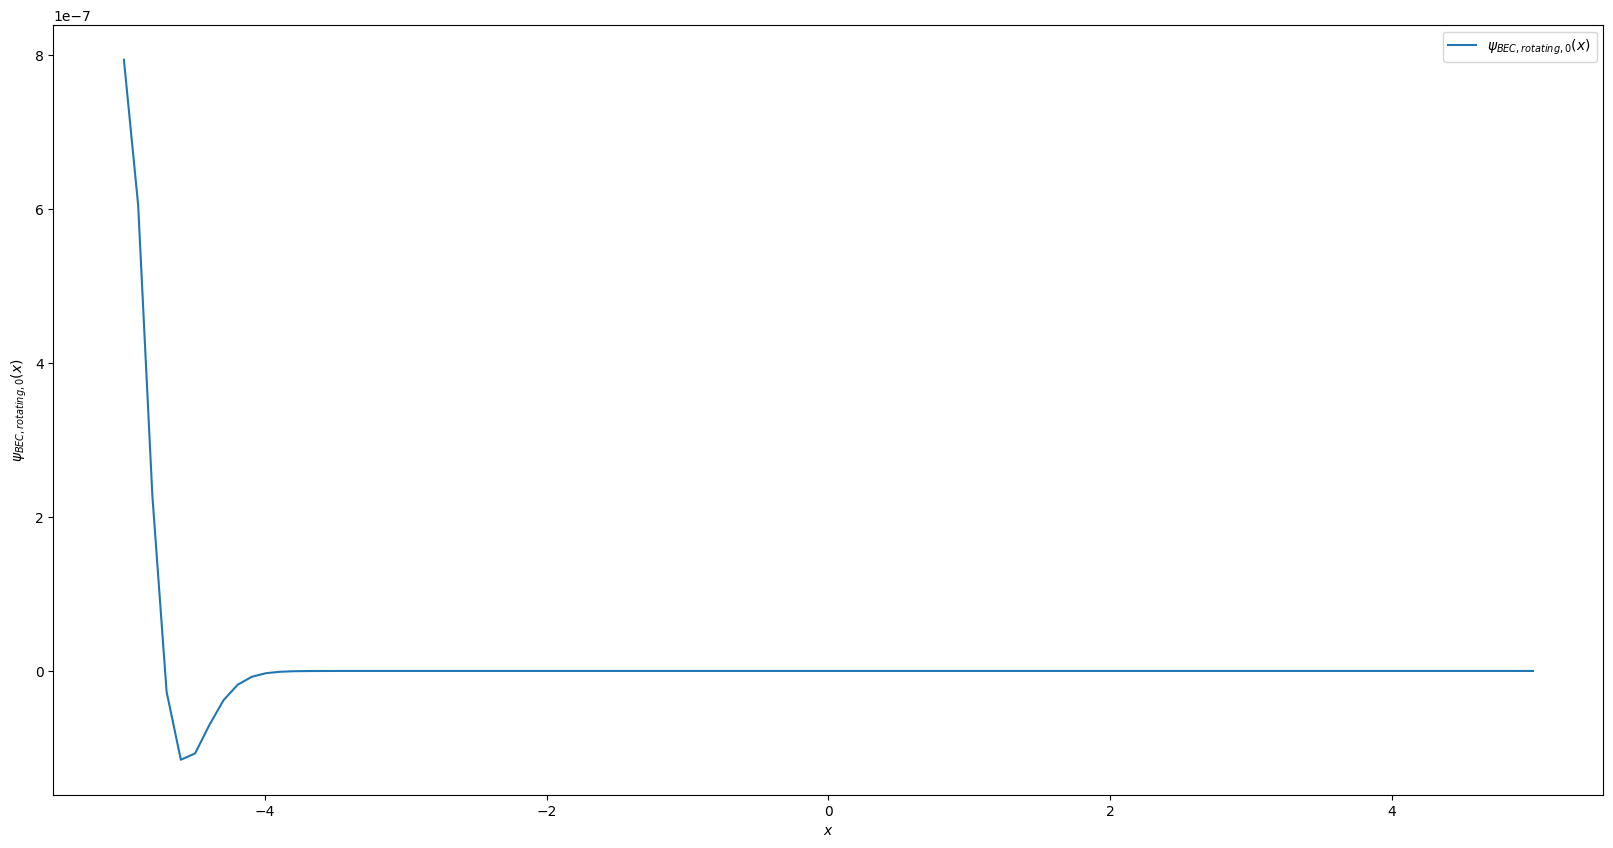

In [29]:
plt.figure(figsize=(20,10))
plt.plot(x,psi_BEC_rotating_0,label='$\psi_{BEC,rotating,0}(x)$')
plt.xlabel('$x$')
plt.ylabel('$\psi_{BEC,rotating,0}(x)$')
plt.legend()
plt.show()

# Plot the thomas-fermi approximation of the quantum state of the BEC in the harmonic trap in the rotating frame at t=0

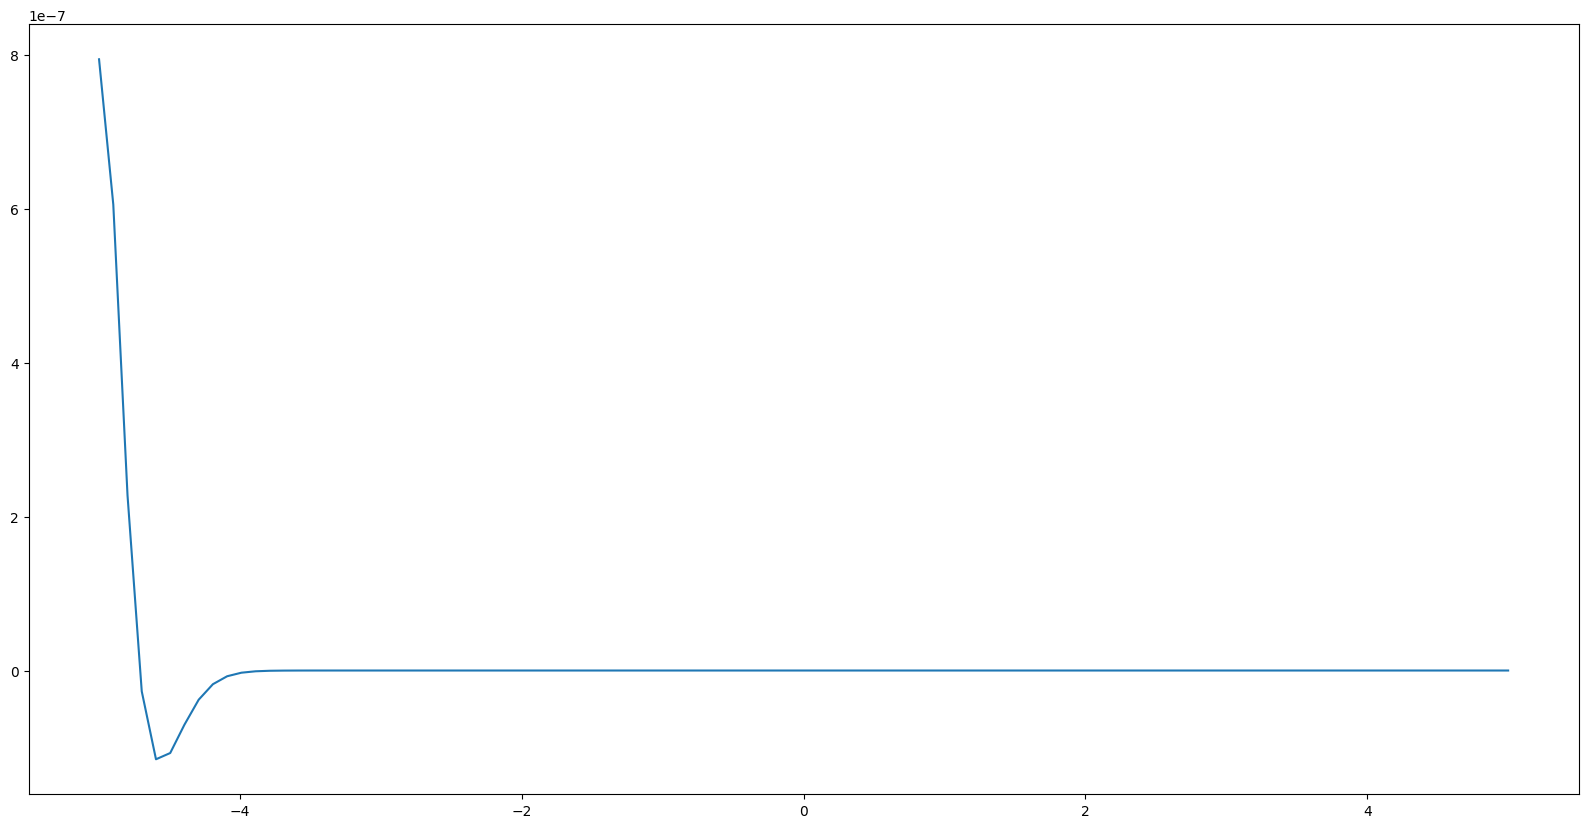

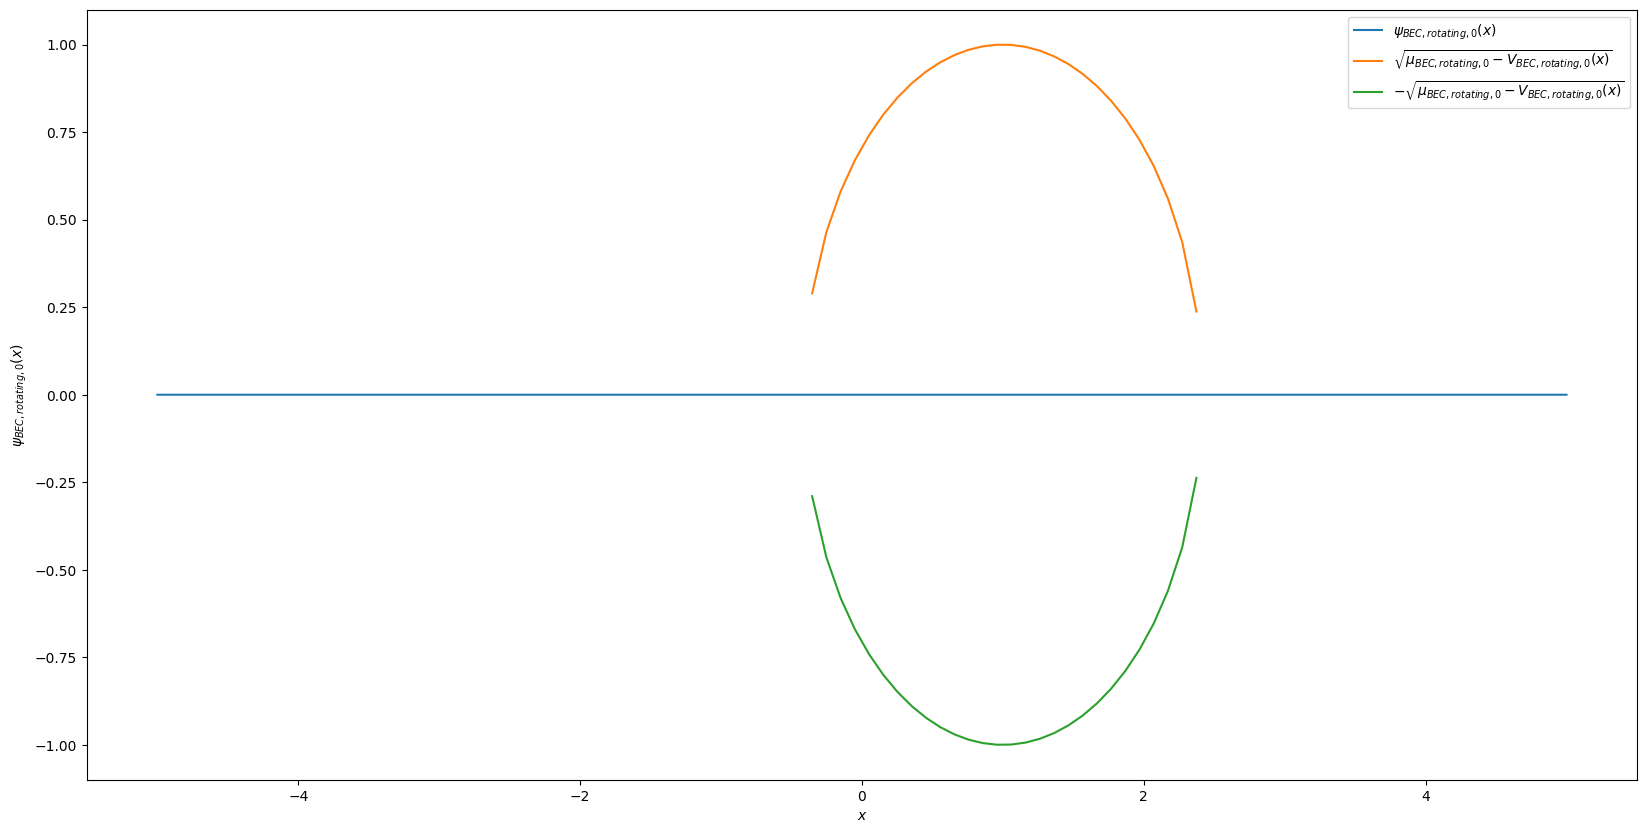

In [34]:
plt.figure(figsize=(20,10))
plt.plot(x,psi_BEC_rotating_0,label='$\psi_{BEC,rotating,0}(x)$')

# Calculate the difference
diff = mu_BEC_rotating_0 - V_BEC_rotating_0

# Select non-negative values from diff
non_neg_diff = np.where(diff >= 0, diff, 0)

# Compute the square root
sqrt_diff = np.sqrt(non_neg_diff)

# Replace the square root of zero with nan where diff was negative
sqrt_diff = np.where(diff >= 0, sqrt_diff, np.nan)

plt.figure(figsize=(20,10))
plt.plot(x, psi_BEC_rotating_0, label='$\psi_{BEC,rotating,0}(x)$')
plt.plot(x, sqrt_diff, label='$\sqrt{\mu_{BEC,rotating,0}-V_{BEC,rotating,0}(x)}$')
plt.plot(x, -sqrt_diff, label='$-\sqrt{\mu_{BEC,rotating,0}-V_{BEC,rotating,0}(x)}$')
plt.xlabel('$x$')
plt.ylabel('$\psi_{BEC,rotating,0}(x)$')
plt.legend()
plt.show()

# Define the harmonic trap in the rotating frame at t=0

$$\psi_{BEC,rotating,0}(x,t) = \psi_0(x)\exp(-i\omega_{0,BEC} t)\exp(-iV_{BEC,rotating,0} t)$$